# INIT

## Import and Install

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## Read DataFrame and Select Columns

In [33]:
df = pd.read_csv('beers.csv')

In [34]:
df = df[['abv', 'ibu', 'style']]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   abv     2348 non-null   object 
 1   ibu     1405 non-null   float64
 2   style   2405 non-null   object 
dtypes: float64(1), object(2)
memory usage: 56.6+ KB


## Check DataFrame distribution without null values
## to decide which approach to use

In [36]:
df.shape

(2410, 3)

In [37]:
null_values = df.isnull().sum()
null_values

abv        62
ibu      1005
style       5
dtype: int64

In [38]:
df_dropped = df.dropna()
df_dropped.shape

(1403, 3)

In [39]:
le = LabelEncoder()
df_dropped['style'] = le.fit_transform(df_dropped['style'])

/tmp/ipykernel_353/3621694368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['style'] = le.fit_transform(df_dropped['style'])


In [40]:
def print_data_distribution(df):
    fig, axes = plt.subplots(1, 3, figsize=(14, 6))
    
    # Distribution plot for 'abv'
    sns.histplot(df['abv'], kde=True, ax=axes[0])
    axes[0].set_title('ABV Distribution')
    axes[0].set_xlabel('ABV')
    
    # Distribution plot for 'ibu'
    sns.histplot(df['ibu'], kde=True, ax=axes[1])
    axes[1].set_title('IBU Distribution')
    axes[1].set_xlabel('IBU')
    
    # Distribution plot for 'ibu'
    sns.histplot(df['style'], kde=True, ax=axes[2])
    axes[2].set_title('Style')
    axes[2].set_xlabel('Style')
    
    plt.tight_layout()
    plt.show()

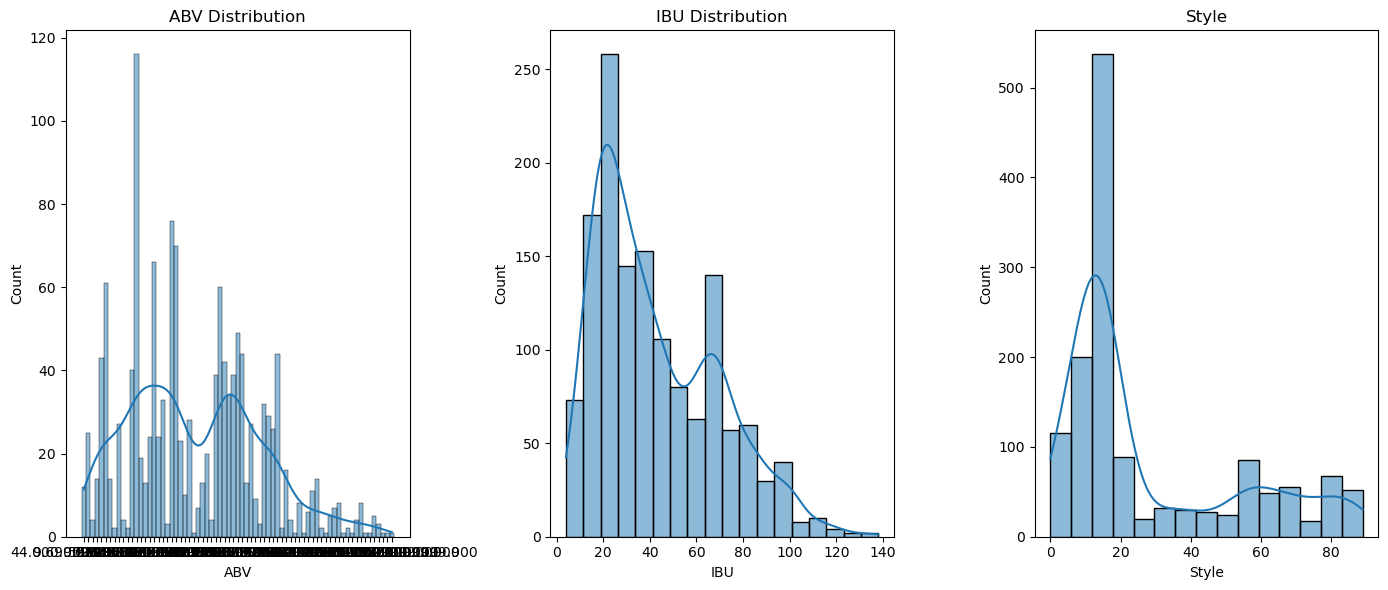

In [41]:
print_data_distribution(df_dropped)

In [42]:
scaler = StandardScaler()
df_dropped = scaler.fit_transform(df_dropped)

ValueError: could not convert string to float: '44.000.000.000.000.000'